# Evaluation Notebook

**The Aim of this notebook**

- Choose the best model between different models, checking risk of overfitting and performance.

- **Input**: different k-fold validation values of different models

- **Output**: Different model performance

- **Validation type**: Cross-validation (k-fold); split training dataset into training subset and validation subset

**Candidate Models**

- Optimal Linear Regression Model

- Optimal Neural Network Model

- Optimal Decision Tree Model

- Optimal PCA Bsed Linear Regression Model

**Model Generalizetion Performance Metric**

- **MSE, R2, MAE, MAPE**


## 1 Define Functions


In [3]:
# Define functions
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# 1 plot related functions----------------
# plot predict and true values on validation dataset
def plot_pred_true(y_test, y_pred, ax):

    data = pd.DataFrame({'y_obs': y_test, 'y_pred': y_pred})

    # plt.figure(figsize=(5, 5))
    sns.scatterplot(data=data, x='y_obs', y='y_pred', s=10, ax=ax)
    ax.plot(y_test, y_test, color='red', label='y=x', lw=1)          # plot the line y=x
    ax.set_title('Observed vs Predicted values in Test Dataset')   # title
    ax.set_xlabel('Observed values')       # label for the x-axis
    ax.set_ylabel('Predicted values')      # label for the y-axis
    ax.legend()
    ax.grid(True)



## 2 Import the Model Performance Data

In [4]:
k = 20

In [5]:
# Import Performance from Neural Network Model 
nn_performance = pd.read_csv('Best_NN_Model_performance.csv', index_col="Unnamed: 0")
nn_val_perforance = nn_performance.iloc[:, : k]
nn_test_perforance = nn_performance.iloc[:, -1] # MSE, R2, MAE, MAPE

# Import Performace from other Models
MSEs = pd.read_csv('Workstream_1_ML_models/regression_CV_neg_mean_squared_error_scores.csv', index_col="Unnamed: 0")
R2s = pd.read_csv('Workstream_1_ML_models/regression_CV_r2_scores.csv', index_col="Unnamed: 0")
MAEs = pd.read_csv('Workstream_1_ML_models/regression_CV_neg_mean_absolute_error_scores.csv', index_col="Unnamed: 0")
MAPEs = pd.read_csv('Workstream_1_ML_models/regression_CV_neg_mean_absolute_percentage_error_scores.csv', index_col="Unnamed: 0")

# Get test performace data on training dataset
lasso_pred_y = pd.read_csv('Workstream_1_ML_models/regression_prediction_Lasso_Regressor.csv')
ridge_pred_y = pd.read_csv('Workstream_1_ML_models/regression_prediction_Ridge_Regressor.csv')
elsnet_pred_y = pd.read_csv('Workstream_1_ML_models/regression_prediction_Elastic_Net_Regressor.csv')
svr_pred_y = pd.read_csv('Workstream_1_ML_models/regression_prediction_Support_Vector_Regressor.csv')
dt_pred_y = pd.read_csv('Workstream_1_ML_models/regression_prediction_Decision_Tree_Regressor.csv')
rf_pred_y = pd.read_csv('Workstream_1_ML_models/regression_prediction_Random_Forrests_Regressor.csv')

nn_val_perforance.columns = MSEs.columns

ture_y = pd.read_csv('Dataset1_test.csv')['CO2 Emissions(g/km)']

def get_test_metrics(real_y, pred_y):
    test_performance = [mean_squared_error(real_y, pred_y),
                         r2_score(real_y, pred_y),
                         mean_absolute_error(real_y, pred_y),
                         mean_absolute_percentage_error(real_y, pred_y)]
    return test_performance

lasso_test_performance = get_test_metrics(ture_y, lasso_pred_y)

ridge_test_performance = get_test_metrics(ture_y, ridge_pred_y)

elsnet_test_performance = get_test_metrics(ture_y, elsnet_pred_y)

svr_test_performance = get_test_metrics(ture_y, svr_pred_y)

dt_test_performance = get_test_metrics(ture_y, dt_pred_y)

rf_test_performance = get_test_metrics(ture_y, rf_pred_y)


In [6]:
MSEs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Lasso_Regressor,63.426323,40.757079,40.062191,62.508301,48.324876,63.165362,51.742868,43.105377,45.333808,71.027309,54.202759,40.801130,50.003156,36.072914,43.171242,46.932829,56.127146,48.164850,38.324207,54.445827
Ridge_Regressor,20.619302,22.165169,24.978656,22.743011,23.818325,43.867624,25.767158,26.725824,19.933355,35.709768,19.398523,24.964560,25.230244,15.257350,20.002558,19.232053,27.831335,16.495640,20.064539,24.682521
Elastic_Net_Regressor,63.426323,40.757079,40.062191,62.508301,48.324876,63.165362,51.742868,43.105377,45.333808,71.027309,54.202759,40.801130,50.003156,36.072914,43.171242,46.932829,56.127146,48.164850,38.324207,54.445827
Support_Vector_Regressor,24.040364,27.029741,31.306007,23.443744,26.822121,59.438692,30.743674,33.287950,20.950890,46.408557,16.025113,27.417953,28.650989,14.900064,23.241142,20.447522,34.993566,13.121383,24.081564,26.546211
Decision_Tree_Regressor,36.221802,20.263800,29.293007,49.495040,30.720564,19.227836,22.718942,41.907697,29.109684,31.772741,43.868260,29.395680,26.010232,20.377050,21.867340,26.978289,29.526231,21.019736,21.671528,25.616211
Random_Forrests_Regressor,34.097885,18.734935,20.016185,36.149764,32.319469,16.132343,22.352453,16.925934,23.448895,34.037047,43.953420,22.974688,27.142523,18.371385,20.237225,25.644115,31.162465,25.604351,22.485213,26.285843


In [7]:
R2s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Lasso_Regressor,0.981320,0.988439,0.986543,0.982112,0.984848,0.983695,0.983434,0.986787,0.986496,0.980541,0.984154,0.986020,0.984626,0.989558,0.987474,0.987361,0.982317,0.986172,0.988815,0.985971
Ridge_Regressor,0.993927,0.993713,0.991609,0.993492,0.992532,0.988676,0.991750,0.991808,0.994062,0.990217,0.994329,0.991446,0.992243,0.995583,0.994196,0.994821,0.991231,0.995264,0.994144,0.993640
Elastic_Net_Regressor,0.981320,0.988439,0.986543,0.982112,0.984848,0.983695,0.983434,0.986787,0.986496,0.980541,0.984154,0.986020,0.984626,0.989558,0.987474,0.987361,0.982317,0.986172,0.988815,0.985971
Support_Vector_Regressor,0.992920,0.992333,0.989484,0.993291,0.991590,0.984657,0.990157,0.989797,0.993759,0.987285,0.995315,0.990606,0.991191,0.995687,0.993257,0.994494,0.988975,0.996233,0.992972,0.993160
Decision_Tree_Regressor,0.989332,0.994252,0.990160,0.985836,0.990368,0.995037,0.992726,0.987154,0.991329,0.991295,0.987176,0.989928,0.992003,0.994101,0.993655,0.992735,0.990697,0.993965,0.993675,0.993400
Random_Forrests_Regressor,0.989958,0.994686,0.993276,0.989655,0.989867,0.995836,0.992844,0.994812,0.993015,0.990675,0.987151,0.992128,0.991655,0.994682,0.994128,0.993094,0.990182,0.992649,0.993438,0.993227


In [8]:
MAEs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Lasso_Regressor,4.773570,4.137159,4.067111,4.884226,4.509667,4.891399,4.603089,4.295062,4.248433,5.076126,4.677758,4.182444,4.439490,4.091483,4.490586,4.353670,4.511038,4.499681,4.157599,4.647982
Ridge_Regressor,2.897911,2.893753,2.857825,3.001966,2.999308,3.531946,2.980875,2.999311,2.967209,3.239776,2.960768,3.029590,3.063909,2.728033,2.951020,2.897304,2.974183,2.881592,2.759234,3.054545
Elastic_Net_Regressor,4.773570,4.137159,4.067111,4.884226,4.509667,4.891399,4.603089,4.295062,4.248433,5.076126,4.677758,4.182444,4.439490,4.091483,4.490586,4.353670,4.511038,4.499681,4.157599,4.647982
Support_Vector_Regressor,2.681889,2.622240,2.642489,2.615326,2.699054,3.345081,2.732599,2.764787,2.631551,3.183561,2.505860,2.801406,2.842407,2.422927,2.786486,2.530368,2.747087,2.334363,2.468176,2.696226
Decision_Tree_Regressor,3.347963,2.950859,3.239760,3.564590,3.200041,2.870093,2.957520,3.197060,3.157381,3.323455,3.221622,3.145695,3.250916,2.914195,3.165248,2.972912,3.105694,2.776124,2.957867,3.006242
Random_Forrests_Regressor,3.373005,2.835153,2.664854,3.148436,3.214937,2.629779,2.811496,2.621821,2.906039,3.307080,3.234252,2.907114,2.998845,2.704325,2.909276,2.827366,2.950748,2.744708,2.853873,2.862793


In [9]:
MAPEs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Lasso_Regressor,0.019263,0.016403,0.016679,0.019806,0.018658,0.018821,0.018179,0.017308,0.017033,0.020047,0.018793,0.017068,0.018225,0.016939,0.018205,0.017821,0.018602,0.017276,0.016685,0.018558
Ridge_Regressor,0.011744,0.011468,0.011818,0.012656,0.012698,0.013578,0.011778,0.011957,0.012110,0.012732,0.012173,0.012572,0.012959,0.011372,0.011692,0.012393,0.012285,0.011057,0.011108,0.012495
Elastic_Net_Regressor,0.019263,0.016403,0.016679,0.019806,0.018658,0.018821,0.018179,0.017308,0.017033,0.020047,0.018793,0.017068,0.018225,0.016939,0.018205,0.017821,0.018602,0.017276,0.016685,0.018558
Support_Vector_Regressor,0.010573,0.010164,0.010891,0.011027,0.010720,0.012637,0.010896,0.011057,0.010340,0.012455,0.010253,0.011602,0.011652,0.010065,0.010958,0.010242,0.011079,0.009043,0.009860,0.010763
Decision_Tree_Regressor,0.013468,0.011778,0.013446,0.014813,0.012728,0.011555,0.011793,0.013302,0.012506,0.013394,0.013790,0.013000,0.012993,0.011908,0.012604,0.012140,0.012495,0.010817,0.012217,0.012098
Random_Forrests_Regressor,0.013819,0.011741,0.010927,0.012614,0.012972,0.010657,0.011459,0.010789,0.011657,0.013411,0.013947,0.011848,0.011887,0.011446,0.011962,0.011810,0.011967,0.010962,0.011887,0.011700


In [10]:
models_val_mse = pd.concat([MSEs, nn_val_perforance.loc[['MSE']]], axis=0, ignore_index=True).values
models_val_r2 = pd.concat([R2s, nn_val_perforance.loc[['R2']]], axis=0, ignore_index=True).values
models_val_mae = pd.concat([MAEs, nn_val_perforance.loc[['MAE']]], axis=0, ignore_index=True).values
models_val_mape = pd.concat([MAPEs, nn_val_perforance.loc[['MAPE']]], axis=0, ignore_index=True).values

models_test_mse = [nn_test_perforance[0], lasso_test_performance[0], ridge_test_performance[0], elsnet_test_performance[0],
                   svr_test_performance[0], dt_test_performance[0], ridge_test_performance[0]]

models_test_r2 = [nn_test_perforance[1], lasso_test_performance[1], ridge_test_performance[1], elsnet_test_performance[1],
                   svr_test_performance[1], dt_test_performance[1], ridge_test_performance[1]]

models_test_mae = [nn_test_perforance[2], lasso_test_performance[2], ridge_test_performance[2], elsnet_test_performance[2],
                   svr_test_performance[2], dt_test_performance[2], ridge_test_performance[2]]

models_test_mape = [nn_test_perforance[3], lasso_test_performance[3], ridge_test_performance[3], elsnet_test_performance[3],
                   svr_test_performance[3], dt_test_performance[3], ridge_test_performance[3]]

C:\Users\87383\AppData\Local\Temp\ipykernel_82440\1334949493.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models_test_mse = [nn_test_perforance[0], lasso_test_performance[0], ridge_test_performance[0], elsnet_test_performance[0],
C:\Users\87383\AppData\Local\Temp\ipykernel_82440\1334949493.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models_test_r2 = [nn_test_perforance[1], lasso_test_performance[1], ridge_test_performance[1], elsnet_test_performance[1],
C:\Users\87383\AppData\Local\Temp\ipykernel_82440\1334949493.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

In [11]:
pd.concat([MSEs, nn_val_perforance.loc[['MSE']]], axis=0, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,63.426323,40.757079,40.062191,62.508301,48.324876,63.165362,51.742868,43.105377,45.333808,71.027309,54.202759,40.801130,50.003156,36.072914,43.171242,46.932829,56.127146,48.164850,38.324207,54.445827
1,20.619302,22.165169,24.978656,22.743011,23.818325,43.867624,25.767158,26.725824,19.933355,35.709768,19.398523,24.964560,25.230244,15.257350,20.002558,19.232053,27.831335,16.495640,20.064539,24.682521
2,63.426323,40.757079,40.062191,62.508301,48.324876,63.165362,51.742868,43.105377,45.333808,71.027309,54.202759,40.801130,50.003156,36.072914,43.171242,46.932829,56.127146,48.164850,38.324207,54.445827
3,24.040364,27.029741,31.306007,23.443744,26.822121,59.438692,30.743674,33.287950,20.950890,46.408557,16.025113,27.417953,28.650989,14.900064,23.241142,20.447522,34.993566,13.121383,24.081564,26.546211
4,36.221802,20.263800,29.293007,49.495040,30.720564,19.227836,22.718942,41.907697,29.109684,31.772741,43.868260,29.395680,26.010232,20.377050,21.867340,26.978289,29.526231,21.019736,21.671528,25.616211
5,34.097885,18.734935,20.016185,36.149764,32.319469,16.132343,22.352453,16.925934,23.448895,34.037047,43.953420,22.974688,27.142523,18.371385,20.237225,25.644115,31.162465,25.604351,22.485213,26.285843
6,5.705410,7.551312,8.596402,6.891008,7.864084,8.393311,7.096413,11.167949,7.039723,18.708132,9.958606,6.533398,7.694758,7.234126,7.713703,6.217944,7.728242,6.524597,8.770668,7.130594


In [12]:
pd.concat([R2s, nn_val_perforance.loc[['R2']]], axis=0, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.981320,0.988439,0.986543,0.982112,0.984848,0.983695,0.983434,0.986787,0.986496,0.980541,0.984154,0.986020,0.984626,0.989558,0.987474,0.987361,0.982317,0.986172,0.988815,0.985971
1,0.993927,0.993713,0.991609,0.993492,0.992532,0.988676,0.991750,0.991808,0.994062,0.990217,0.994329,0.991446,0.992243,0.995583,0.994196,0.994821,0.991231,0.995264,0.994144,0.993640
2,0.981320,0.988439,0.986543,0.982112,0.984848,0.983695,0.983434,0.986787,0.986496,0.980541,0.984154,0.986020,0.984626,0.989558,0.987474,0.987361,0.982317,0.986172,0.988815,0.985971
3,0.992920,0.992333,0.989484,0.993291,0.991590,0.984657,0.990157,0.989797,0.993759,0.987285,0.995315,0.990606,0.991191,0.995687,0.993257,0.994494,0.988975,0.996233,0.992972,0.993160
4,0.989332,0.994252,0.990160,0.985836,0.990368,0.995037,0.992726,0.987154,0.991329,0.991295,0.987176,0.989928,0.992003,0.994101,0.993655,0.992735,0.990697,0.993965,0.993675,0.993400
5,0.989958,0.994686,0.993276,0.989655,0.989867,0.995836,0.992844,0.994812,0.993015,0.990675,0.987151,0.992128,0.991655,0.994682,0.994128,0.993094,0.990182,0.992649,0.993438,0.993227
6,0.998276,0.997998,0.997880,0.998047,0.997520,0.997697,0.997966,0.996300,0.997954,0.994699,0.997042,0.998116,0.997630,0.997359,0.997739,0.998165,0.997640,0.998117,0.997101,0.998019


In [13]:
# Model dictionary
models = {"Neural Network Model": nn_performance, 
          "Lasso Regression": lasso_test_performance,
          "Ridge Regression": ridge_test_performance,
          "Elastic Net Regression": elsnet_test_performance,
          "Support Vector Regression": svr_test_performance,
          "Decision Tree Regression": dt_test_performance,
          "Random Forests Regression": rf_test_performance}


### 2.1 Normality Check

For normality check, **Shapiro-Wilk Test** is used.

Define funtion to check the metric normality:

- Input: 

    - models: containing model information (name, index), *dictionary*

    - model_val_scores: the performance metric on k-fold validation, *np.array*

- Output: 

    - `result_table`, all results of different models, including `Model`[character], `Shapiro-Wilk Test Statistic`[number], `p-value`[number], `Normality`[character], *DataFrame*
    - `if_normal_arrary`, an arrary indicator to show if the meteric is normal distributed. 
    


In [14]:
from scipy.stats import shapiro
alpha = 0.1

In [15]:
def check_normality(models, model_val_scores):

    result_table = []           # table - all information
    if_normal_arrary = []       # 1D arrary, indicate Yes or No

    # Iterate every model
    for i, model_name in enumerate(models.keys()):
        stat, p_value = shapiro(model_val_scores[i])

        print(f"{model_name}: Statistic={stat:.4f}, p-value={p_value:.4f}")
        normality = "❌ No" if p_value < alpha else "✅ Yes"

        if p_value > alpha:
            print(f"    ✅ {model_name} performance scores appear to be normally distributed.")
            if_normal_arrary.append("Yes")
        else:
            print(f"    ❌ {model_name} performance scores are NOT normally distributed.")
            if_normal_arrary.append("No")

        result_table.append([model_name, stat, p_value, normality])

    return pd.DataFrame(result_table, columns=["Model", "Shapiro-Wilk Test Statistic", "p-value", "Normality"]), if_normal_arrary

#### Check Normality

In [16]:
# Check MSE
print("\n-------Shapiro-Wilk Test: Normality Check MSE------------------------------\n")
df_result_normality_MSE, normality_MSE = check_normality(models, models_val_mse)


-------Shapiro-Wilk Test: Normality Check MSE------------------------------

Neural Network Model: Statistic=0.9487, p-value=0.3474
    ✅ Neural Network Model performance scores appear to be normally distributed.
Lasso Regression: Statistic=0.8469, p-value=0.0047
    ❌ Lasso Regression performance scores are NOT normally distributed.
Ridge Regression: Statistic=0.9487, p-value=0.3474
    ✅ Ridge Regression performance scores appear to be normally distributed.
Elastic Net Regression: Statistic=0.8723, p-value=0.0129
    ❌ Elastic Net Regression performance scores are NOT normally distributed.
Support Vector Regression: Statistic=0.8879, p-value=0.0246
    ❌ Support Vector Regression performance scores are NOT normally distributed.
Decision Tree Regression: Statistic=0.9378, p-value=0.2175
    ✅ Decision Tree Regression performance scores appear to be normally distributed.
Random Forests Regression: Statistic=0.6441, p-value=0.0000
    ❌ Random Forests Regression performance scores are 

In [17]:
# Check R2
print("\n-------Shapiro-Wilk Test: Normality Check R2------------------------------\n")
df_result_normality_R2, normality_R2 = check_normality(models, models_val_r2)



-------Shapiro-Wilk Test: Normality Check R2------------------------------

Neural Network Model: Statistic=0.9719, p-value=0.7938
    ✅ Neural Network Model performance scores appear to be normally distributed.
Lasso Regression: Statistic=0.9488, p-value=0.3492
    ✅ Lasso Regression performance scores appear to be normally distributed.
Ridge Regression: Statistic=0.9719, p-value=0.7938
    ✅ Ridge Regression performance scores appear to be normally distributed.
Elastic Net Regression: Statistic=0.9593, p-value=0.5297
    ✅ Elastic Net Regression performance scores appear to be normally distributed.
Support Vector Regression: Statistic=0.9319, p-value=0.1682
    ✅ Support Vector Regression performance scores appear to be normally distributed.
Decision Tree Regression: Statistic=0.9513, p-value=0.3869
    ✅ Decision Tree Regression performance scores appear to be normally distributed.
Random Forests Regression: Statistic=0.7134, p-value=0.0001
    ❌ Random Forests Regression performan

In [18]:
# Check MAE
print("\n-------Shapiro-Wilk Test: Normality Check MAE------------------------------\n")
df_result_normality_MAE, normality_MAE = check_normality(models, models_val_mae)



-------Shapiro-Wilk Test: Normality Check MAE------------------------------

Neural Network Model: Statistic=0.9586, p-value=0.5163
    ✅ Neural Network Model performance scores appear to be normally distributed.
Lasso Regression: Statistic=0.8334, p-value=0.0028
    ❌ Lasso Regression performance scores are NOT normally distributed.
Ridge Regression: Statistic=0.9586, p-value=0.5163
    ✅ Ridge Regression performance scores appear to be normally distributed.
Elastic Net Regression: Statistic=0.8909, p-value=0.0279
    ❌ Elastic Net Regression performance scores are NOT normally distributed.
Support Vector Regression: Statistic=0.9683, p-value=0.7187
    ✅ Support Vector Regression performance scores appear to be normally distributed.
Decision Tree Regression: Statistic=0.9278, p-value=0.1403
    ✅ Decision Tree Regression performance scores appear to be normally distributed.
Random Forests Regression: Statistic=0.9601, p-value=0.5464
    ✅ Random Forests Regression performance scores

In [19]:
# Check MAPE
print("\n-------Shapiro-Wilk Test: Normality Check MAE------------------------------\n")
df_result_normality_MAPE, normality_MAPE = check_normality(models, models_val_mape)


-------Shapiro-Wilk Test: Normality Check MAE------------------------------

Neural Network Model: Statistic=0.9527, p-value=0.4103
    ✅ Neural Network Model performance scores appear to be normally distributed.
Lasso Regression: Statistic=0.9798, p-value=0.9314
    ✅ Lasso Regression performance scores appear to be normally distributed.
Ridge Regression: Statistic=0.9527, p-value=0.4103
    ✅ Ridge Regression performance scores appear to be normally distributed.
Elastic Net Regression: Statistic=0.9572, p-value=0.4890
    ✅ Elastic Net Regression performance scores appear to be normally distributed.
Support Vector Regression: Statistic=0.9820, p-value=0.9570
    ✅ Support Vector Regression performance scores appear to be normally distributed.
Decision Tree Regression: Statistic=0.9031, p-value=0.0473
    ❌ Decision Tree Regression performance scores are NOT normally distributed.
Random Forests Regression: Statistic=0.8853, p-value=0.0221
    ❌ Random Forests Regression performance s

Judging from the Shapiro-Wilk Test, **the performance metrics (MSE and R2) of all the four models are not normally distributed**. Thus nomrality assumption does not hold. For the following overfitting check and comparison check, tests under assumption that normality does not hold are selected. But for MAE metric, normality holds.

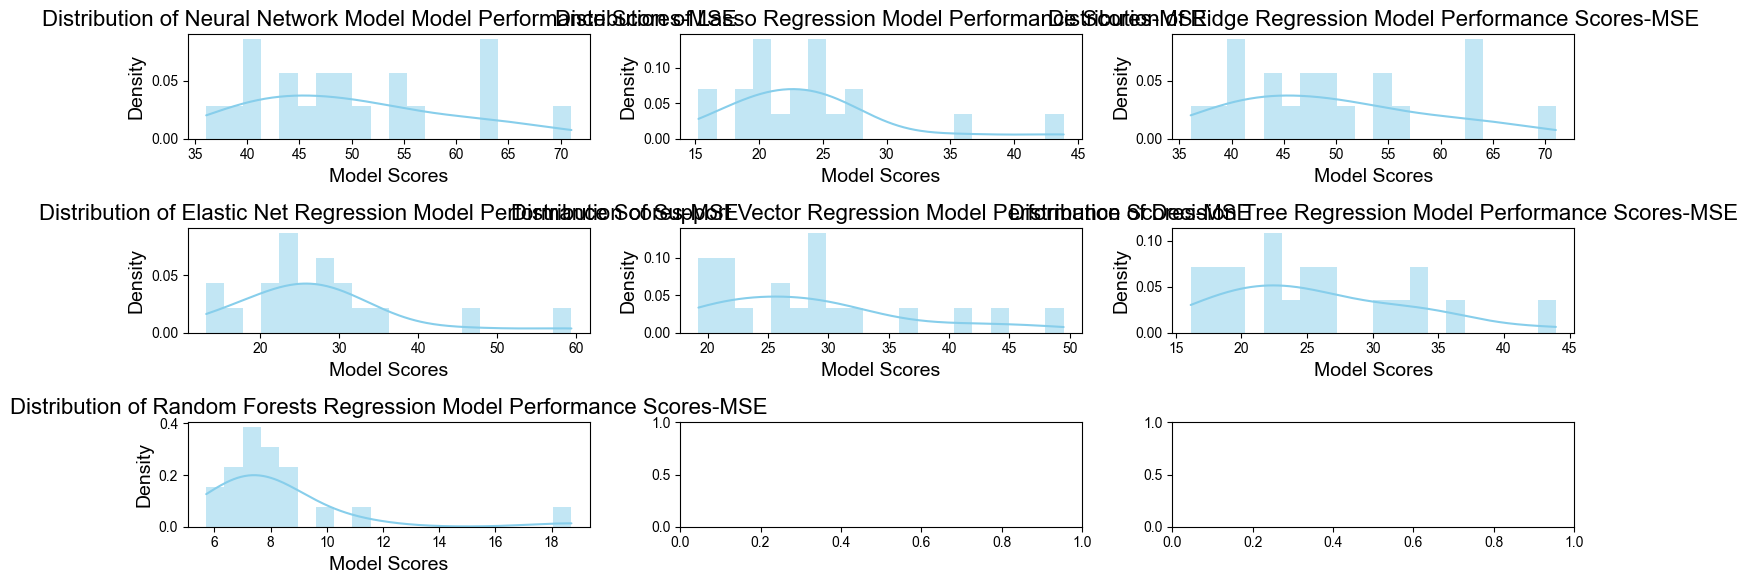

In [20]:
# Check normality by ploting
import seaborn as sns
import matplotlib.pyplot as plt

# Check nomality of Four models
fig, ax = plt.subplots(3,3, figsize=(15,6))
ax = ax.flatten()

for i, model_name in enumerate(models.keys()):
    sns.set_theme(style="whitegrid")
    sns.histplot(models_val_mse[i], kde=True, bins=20, color="skyblue", stat="density", linewidth=0, ax=ax[i])
    ax[i].set_title(f"Distribution of {model_name} Model Performance Scores-MSE", fontsize=16)
    ax[i].set_xlabel("Model Scores", fontsize=14)
    ax[i].set_ylabel("Density", fontsize=14)

plt.tight_layout()
plt.show()

- Since the normality does not hold for all the models, **One-sample Wilcoxon Test** should be used to check overfittting. And for model comparison and selection,  Friedman Test and successive Nemenyi test should be employed.

### 2.2 Overfitting Check

For overfitting check, since the normality varies, **One-Sample Wilcoxon Test**  or **One-Sample t-test** is chosen based on the normality of the metric.

Define funtion to check the risk of overfitting:

- Input: 

    - models: containing model information (name, index), dictionary

    - model_val_scores: the performance metric on k-fold validation, np.array
    
    - model_test_scores: the performance metric on k-fold validation, np.array
    
    - normality - containing metric normality, np.array

    - h1 - alternative type: H1 hypothesis, indicating whether "less" shows sign of overfitting or "greater" shows sign of overfitting

- Output: 

    - all results of different models, including `Model`[character], `If Normal`[character], `Test Type`[character], `Test statistic`[number], `p-value`[number], `Overfitting`[character]


In [21]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
alpha = 0.1


In [22]:
# Define function to check overfitting
def check_overfitting(models, model_val_scores, model_test_scores, normality, h1):

    save_result = []

    # Iterate every model
    for i, model_name in enumerate(models.keys()):

        train_scores = model_val_scores[i]
        test_scores = model_test_scores[i]

        # Select test based on the normality check results
        if normality[i] == "Yes":  # Use One-sample t-test
            test_type = "One-sample t-test"
            stat, p_value = ttest_1samp(train_scores, test_scores) 


        if normality[i] == "No":  # Use One-sample Wilcoxon-test
            test_type = "One-sample Wilcoxon-test"
            difference = train_scores - test_scores
            stat, p_value = wilcoxon(difference, alternative=h1)  

        # summary overfitting results
        overfitting = "⚠️ Potenial overfitting" if p_value < alpha else "✅ NO Risk of overfitting"

        print(f"    {model_name}:  Test-statistic={stat:.4f}, p-value={p_value:.4f}")

        if p_value < alpha:
            print(f"⚠️ For {model_name}, {test_type} shows significant difference: Potenial overfitting!")
        else:
            print(f"✅ For {model_name}, {test_type} shows NO significant difference: NO Risk of overfitting.")
        
        save_result.append([model_name, normality[i], test_type, stat, p_value, overfitting])

    return pd.DataFrame(save_result, columns=["Model", "If Normal", "Test Type", "Test statistic", "p-value", "Overfitting"])

#### MSE as metric

In [23]:
# Check Overfitting using MSE
# Overfitting sign: MSE for train is significantly smaller than in test, alternative is gap less than 0, h1=less
print("\n-------Overfitting Check MSE------------------")
df_result_overfitting_MSE = check_overfitting(models, models_val_mse, models_test_mse, normality_MSE, h1="less")



-------Overfitting Check MSE------------------
    Neural Network Model:  Test-statistic=19.5095, p-value=0.0000
⚠️ For Neural Network Model, One-sample t-test shows significant difference: Potenial overfitting!
    Lasso Regression:  Test-statistic=0.0000, p-value=0.0000
⚠️ For Lasso Regression, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Ridge Regression:  Test-statistic=12.5916, p-value=0.0000
⚠️ For Ridge Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Elastic Net Regression:  Test-statistic=2.0000, p-value=0.0000
⚠️ For Elastic Net Regression, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Support Vector Regression:  Test-statistic=105.0000, p-value=0.5073
✅ For Support Vector Regression, One-sample Wilcoxon-test shows NO significant difference: NO Risk of overfitting.
    Decision Tree Regression:  Test-statistic=0.6057, p-value=0.5519
✅ For Decision Tree Regression, One-

#### R2 as metric

In [24]:
# Check Overfitting using R2
# Overfitting sign: R2 for train is significantly higher than in test, alternative is gap greater than 0, h1=greater
print("\n-------Overfitting Check R2------------------")
df_result_overfitting_R2 = check_overfitting(models, models_val_r2, models_test_r2, normality_R2, h1="greater")


-------Overfitting Check R2------------------
    Neural Network Model:  Test-statistic=-21.9244, p-value=0.0000
⚠️ For Neural Network Model, One-sample t-test shows significant difference: Potenial overfitting!
    Lasso Regression:  Test-statistic=18.8950, p-value=0.0000
⚠️ For Lasso Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Ridge Regression:  Test-statistic=-14.3295, p-value=0.0000
⚠️ For Ridge Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Elastic Net Regression:  Test-statistic=9.9314, p-value=0.0000
⚠️ For Elastic Net Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Support Vector Regression:  Test-statistic=-0.9961, p-value=0.3317
✅ For Support Vector Regression, One-sample t-test shows NO significant difference: NO Risk of overfitting.
    Decision Tree Regression:  Test-statistic=-0.9971, p-value=0.3313
✅ For Decision Tree Regression, One-sample t-test shows

#### MAE as metric

In [25]:
# Check Overfitting using R2
# Overfitting sign: MSE for train is significantly smaller than in test, alternative is gap less than 0, h1=less
print("\n-------Overfitting Check MAE------------------")
df_result_overfitting_MAE = check_overfitting(models, models_val_mae, models_test_mae, normality_MAE, h1="less")


-------Overfitting Check MAE------------------
    Neural Network Model:  Test-statistic=37.0400, p-value=0.0000
⚠️ For Neural Network Model, One-sample t-test shows significant difference: Potenial overfitting!
    Lasso Regression:  Test-statistic=0.0000, p-value=0.0000
⚠️ For Lasso Regression, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Ridge Regression:  Test-statistic=23.3584, p-value=0.0000
⚠️ For Ridge Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Elastic Net Regression:  Test-statistic=0.0000, p-value=0.0000
⚠️ For Elastic Net Regression, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Support Vector Regression:  Test-statistic=8.2575, p-value=0.0000
⚠️ For Support Vector Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Decision Tree Regression:  Test-statistic=-1.5251, p-value=0.1437
✅ For Decision Tree Regression, One-sample t-tes

#### MAPE as metric

In [26]:
# Check Overfitting using R2
# Overfitting sign: MSE for train is significantly smaller than in test, alternative is gap less than 0, h1=less
print("\n-------Overfitting Check MAE------------------")
df_result_overfitting_MAPE = check_overfitting(models, models_val_mape, models_test_mape, normality_MAPE, h1="less")


-------Overfitting Check MAE------------------
    Neural Network Model:  Test-statistic=40.7942, p-value=0.0000
⚠️ For Neural Network Model, One-sample t-test shows significant difference: Potenial overfitting!
    Lasso Regression:  Test-statistic=-41.0080, p-value=0.0000
⚠️ For Lasso Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Ridge Regression:  Test-statistic=24.7141, p-value=0.0000
⚠️ For Ridge Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Elastic Net Regression:  Test-statistic=-38.4869, p-value=0.0000
⚠️ For Elastic Net Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Support Vector Regression:  Test-statistic=7.5910, p-value=0.0000
⚠️ For Support Vector Regression, One-sample t-test shows significant difference: Potenial overfitting!
    Decision Tree Regression:  Test-statistic=78.0000, p-value=0.1650
✅ For Decision Tree Regression, One-sample Wilcoxon-test s

- From the checking results above, using metric like MSE or R-square show that Decision tree and Neural Network model has potenial risk of overfitting, while PCA and Linear Regression passed the overfitting check.

- But if using the MAPE as metric, test results show that all model pass the overfitting check, showing no risk of overfitting. 

- In conclusion, considering the comprehensive performances of different metrics, **all the models are feasible** and can be further checked to determine the optimal model.

### 2.3 Compare the Performance of Different Models

#### 2.3.1 Friedman Test to check if significant different exists between models

In [27]:
from scipy.stats import ttest_rel, friedmanchisquare

# Perform ANOVA test
friedman_stat, friedman_p = friedmanchisquare(*models_val_r2)

print(f"Friedman Test: F-statistic={friedman_stat:.4f}, p-value={friedman_p:.4f}")

# Interpret the results
alpha = 0.05
if friedman_p < alpha:
    print("❌ Friedman Test: Reject the null hypothesis: At least one model is significantly different.")
else:
    print("✅ Friedman Test: Fail to reject the null hypothesis: All models are not significantly different.")



Friedman Test: F-statistic=102.5673, p-value=0.0000
❌ Friedman Test: Reject the null hypothesis: At least one model is significantly different.


- So there exists at least one model that performs better than the rest.

#### 2.3.2 Nemenyi Test to Select the Best Model

- In the model selection part, MSE is used as performance metric to select the optimal model.

Post-hoc Nemenyi test results:
              0             1             2         3         4         5  \
0  1.000000e+00  5.553909e-07  1.000000e+00  0.003579  0.002697  0.000163   
1  5.553909e-07  1.000000e+00  5.553909e-07  0.527684  0.577610  0.928962   
2  1.000000e+00  5.553909e-07  1.000000e+00  0.003579  0.002697  0.000163   
3  3.578557e-03  5.276838e-01  3.578557e-03  1.000000  1.000000  0.990645   
4  2.697029e-03  5.776101e-01  2.697029e-03  1.000000  1.000000  0.994704   
5  1.626090e-04  9.289616e-01  1.626090e-04  0.990645  0.994704  1.000000   
6  1.709743e-14  1.632981e-01  1.709743e-14  0.000316  0.000437  0.006187   

              6  
0  1.709743e-14  
1  1.632981e-01  
2  1.709743e-14  
3  3.159388e-04  
4  4.366741e-04  
5  6.186505e-03  
6  1.000000e+00  


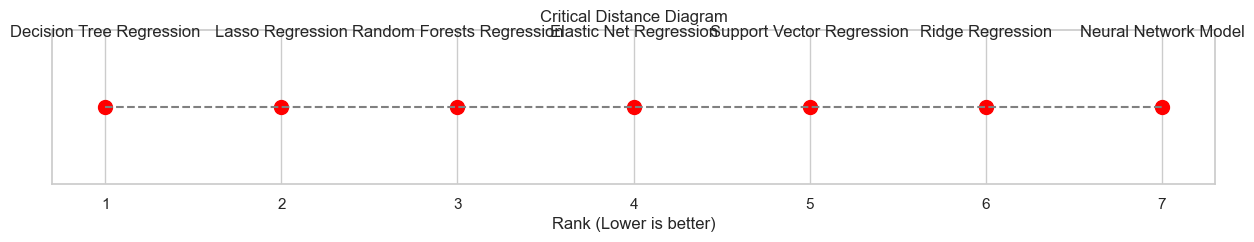

In [28]:
import scikit_posthocs as sp

# Post-hoc Nemenyi test if Friedman test is significant
if friedman_p < 0.05:
    posthoc_results = sp.posthoc_nemenyi_friedman(models_val_mse.T)
    print("Post-hoc Nemenyi test results:")
    print(posthoc_results)

    # Plot Critical Distance (CD) Diagram
    ranks = np.argsort(models_val_mse.mean(axis=1)) + 1  # Ranking models
    model_names = list(models.keys())

    plt.figure(figsize=(15, 2))
    plt.scatter(ranks, [1] * len(model_names), marker='o', color='red', s=100, label='Models')
    plt.hlines(y=1, xmin=min(ranks), xmax=max(ranks), colors='gray', linestyles='dashed')

    for rank, name in zip(ranks, model_names):
        plt.text(rank, 1.05, name, ha='center', fontsize=12)

    plt.title("Critical Distance Diagram")
    plt.xlabel("Rank (Lower is better)")
    plt.yticks([])  # Hide y-axis labels
    plt.show()

## 3 Mltiple Tables 

### 3.1 Normality and Overfitting Check

#### Normality Check Results

- MSE

In [29]:
# Shapiro-Wilk test
print("\nNormality Test Results for MSE:\n")
print(df_result_normality_MSE.to_markdown(index=False))


Normality Test Results for MSE:

| Model                     |   Shapiro-Wilk Test Statistic |     p-value | Normality   |
|:--------------------------|------------------------------:|------------:|:------------|
| Neural Network Model      |                      0.948675 | 0.347422    | ✅ Yes      |
| Lasso Regression          |                      0.846934 | 0.00473775  | ❌ No       |
| Ridge Regression          |                      0.948675 | 0.347422    | ✅ Yes      |
| Elastic Net Regression    |                      0.872269 | 0.0128818   | ❌ No       |
| Support Vector Regression |                      0.887883 | 0.0245925   | ❌ No       |
| Decision Tree Regression  |                      0.937762 | 0.217455    | ✅ Yes      |
| Random Forests Regression |                      0.644104 | 8.73935e-06 | ❌ No       |


- R2

In [30]:
print("\nNormality Test Results for R2:\n")
print(df_result_normality_R2.to_markdown(index=False))


Normality Test Results for R2:

| Model                     |   Shapiro-Wilk Test Statistic |     p-value | Normality   |
|:--------------------------|------------------------------:|------------:|:------------|
| Neural Network Model      |                      0.971871 | 0.793797    | ✅ Yes      |
| Lasso Regression          |                      0.9488   | 0.349243    | ✅ Yes      |
| Ridge Regression          |                      0.971871 | 0.793797    | ✅ Yes      |
| Elastic Net Regression    |                      0.959287 | 0.529713    | ✅ Yes      |
| Support Vector Regression |                      0.931937 | 0.168243    | ✅ Yes      |
| Decision Tree Regression  |                      0.951279 | 0.38692     | ✅ Yes      |
| Random Forests Regression |                      0.713416 | 5.70779e-05 | ❌ No       |


- MAE

In [31]:
print("\nNormality Test Results for MAE:\n")
print(df_result_normality_MAE.to_markdown(index=False))


Normality Test Results for MAE:

| Model                     |   Shapiro-Wilk Test Statistic |    p-value | Normality   |
|:--------------------------|------------------------------:|-----------:|:------------|
| Neural Network Model      |                      0.9586   | 0.516277   | ✅ Yes      |
| Lasso Regression          |                      0.833393 | 0.00284402 | ❌ No       |
| Ridge Regression          |                      0.9586   | 0.516277   | ✅ Yes      |
| Elastic Net Regression    |                      0.890858 | 0.0278879  | ❌ No       |
| Support Vector Regression |                      0.968303 | 0.718713   | ✅ Yes      |
| Decision Tree Regression  |                      0.927838 | 0.140302   | ✅ Yes      |
| Random Forests Regression |                      0.960127 | 0.546397   | ✅ Yes      |


- MAPE

In [32]:
print("\nNormality Test Results for MAPE:\n")
print(df_result_normality_MAPE.to_markdown(index=False))


Normality Test Results for MAPE:

| Model                     |   Shapiro-Wilk Test Statistic |   p-value | Normality   |
|:--------------------------|------------------------------:|----------:|:------------|
| Neural Network Model      |                      0.952719 | 0.410259  | ✅ Yes      |
| Lasso Regression          |                      0.979794 | 0.931416  | ✅ Yes      |
| Ridge Regression          |                      0.952719 | 0.410259  | ✅ Yes      |
| Elastic Net Regression    |                      0.957171 | 0.488989  | ✅ Yes      |
| Support Vector Regression |                      0.981982 | 0.957042  | ✅ Yes      |
| Decision Tree Regression  |                      0.903145 | 0.0472528 | ❌ No       |
| Random Forests Regression |                      0.88534  | 0.0221003 | ❌ No       |


#### Overfitting Check

- MSE

In [33]:
print("\nONe-sample Wilcoxon Test Results for MSE:\n")
print(df_result_overfitting_MSE.to_markdown(index=False))


ONe-sample Wilcoxon Test Results for MSE:

| Model                     | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:--------------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Neural Network Model      | Yes         | One-sample t-test        |        19.5095   | 4.99918e-14 | ⚠️ Potenial overfitting   |
| Lasso Regression          | No          | One-sample Wilcoxon-test |         0        | 9.53674e-07 | ⚠️ Potenial overfitting   |
| Ridge Regression          | Yes         | One-sample t-test        |        12.5916   | 1.14459e-10 | ⚠️ Potenial overfitting   |
| Elastic Net Regression    | No          | One-sample Wilcoxon-test |         2        | 2.86102e-06 | ⚠️ Potenial overfitting   |
| Support Vector Regression | No          | One-sample Wilcoxon-test |       105        | 0.507282    | ✅ NO Risk of overfitting |
| Decision Tree Regression  | Yes

- R2

In [34]:
print("\nONe-sample Wilcoxon Test Results for R2:")
print(df_result_overfitting_R2.to_markdown(index=False))


ONe-sample Wilcoxon Test Results for R2:
| Model                     | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:--------------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Neural Network Model      | Yes         | One-sample t-test        |       -21.9244   | 5.95725e-15 | ⚠️ Potenial overfitting   |
| Lasso Regression          | Yes         | One-sample t-test        |        18.895    | 8.92625e-14 | ⚠️ Potenial overfitting   |
| Ridge Regression          | Yes         | One-sample t-test        |       -14.3295   | 1.22691e-11 | ⚠️ Potenial overfitting   |
| Elastic Net Regression    | Yes         | One-sample t-test        |         9.93141  | 5.87946e-09 | ⚠️ Potenial overfitting   |
| Support Vector Regression | Yes         | One-sample t-test        |        -0.996106 | 0.331716    | ✅ NO Risk of overfitting |
| Decision Tree Regression  | Yes  

- MAE

In [35]:
print("\nOne-sample t-Test Results for MAE:")
print(df_result_overfitting_MAE.to_markdown(index=False))


One-sample t-Test Results for MAE:
| Model                     | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:--------------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Neural Network Model      | Yes         | One-sample t-test        |         37.04    | 3.5173e-19  | ⚠️ Potenial overfitting   |
| Lasso Regression          | No          | One-sample Wilcoxon-test |          0       | 9.53674e-07 | ⚠️ Potenial overfitting   |
| Ridge Regression          | Yes         | One-sample t-test        |         23.3584  | 1.86242e-15 | ⚠️ Potenial overfitting   |
| Elastic Net Regression    | No          | One-sample Wilcoxon-test |          0       | 9.53674e-07 | ⚠️ Potenial overfitting   |
| Support Vector Regression | Yes         | One-sample t-test        |          8.25746 | 1.04367e-07 | ⚠️ Potenial overfitting   |
| Decision Tree Regression  | Yes       

- MAPE

In [36]:
print("\nCombined One-sample t-Test/Wilcoxon Test Results for MAPE:")
print(df_result_overfitting_MAPE.to_markdown(index=False))


Combined One-sample t-Test/Wilcoxon Test Results for MAPE:
| Model                     | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:--------------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Neural Network Model      | Yes         | One-sample t-test        |         40.7942  | 5.74148e-20 | ⚠️ Potenial overfitting   |
| Lasso Regression          | Yes         | One-sample t-test        |        -41.008   | 5.20438e-20 | ⚠️ Potenial overfitting   |
| Ridge Regression          | Yes         | One-sample t-test        |         24.7141  | 6.58694e-16 | ⚠️ Potenial overfitting   |
| Elastic Net Regression    | Yes         | One-sample t-test        |        -38.4869  | 1.71385e-19 | ⚠️ Potenial overfitting   |
| Support Vector Regression | Yes         | One-sample t-test        |          7.59096 | 3.62164e-07 | ⚠️ Potenial overfitting   |
| Decision Tree 

### 3.2 Model Comparison and Optimal Model Selection

- Nemenyi post-hoc test

In [37]:
posthoc_results = sp.posthoc_nemenyi_friedman(models_val_mse.T)
print("\nPost-hoc Nemenyi test results (p-values):")

print(posthoc_results.to_markdown())



Post-hoc Nemenyi test results (p-values):
|    |           0 |           1 |           2 |           3 |           4 |           5 |           6 |
|---:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|
|  0 | 1           | 5.55391e-07 | 1           | 0.00357856  | 0.00269703  | 0.000162609 | 1.70974e-14 |
|  1 | 5.55391e-07 | 1           | 5.55391e-07 | 0.527684    | 0.57761     | 0.928962    | 0.163298    |
|  2 | 1           | 5.55391e-07 | 1           | 0.00357856  | 0.00269703  | 0.000162609 | 1.70974e-14 |
|  3 | 0.00357856  | 0.527684    | 0.00357856  | 1           | 1           | 0.990645    | 0.000315939 |
|  4 | 0.00269703  | 0.57761     | 0.00269703  | 1           | 1           | 0.994704    | 0.000436674 |
|  5 | 0.000162609 | 0.928962    | 0.000162609 | 0.990645    | 0.994704    | 1           | 0.00618651  |
|  6 | 1.70974e-14 | 0.163298    | 1.70974e-14 | 0.000315939 | 0.000436674 | 0.00618651  | 1           |


### 3.3 Optimal Model and Reflections

- According to the figures and above, it can be shown that **the best model is Decision Tree Model**. Followed by Neural Network model. And the Linear Regression and PCA Regression models are inferior models.

- Considering the overfitting issue with Neural Network Model, **the Decision Tree Model is selected as the optimal model for the CO2 Emission prediction task.**

- In the following code, inspect some feature of the Optimal Model.

In [38]:
# Showing the performance of the optimal model
print(f"Optimal Model: Decision Tree Model")
print(f"    K-fold Validation MSE:  {dt_val_performance}")
print(f"    Mean Validation MSE:    {np.mean(dt_k_fold_mse):3f}")
print(f"    Test Dataset MSE:       {dt_test_mse:3f}")
print(f"    Test Dataset R2:        {dt_test_r2:3f}")
print(f"    Test Dataset MAE:       {dt_test_mae:3f}")
print(f"    Test Dataset MAPE:      {dt_test_mape:3f}")

Optimal Model: Decision Tree Model


NameError: name 'dt_val_performance' is not defined

Text(0.5, 1.0, 'Decision Tree Model: Observed vs Predicted values')

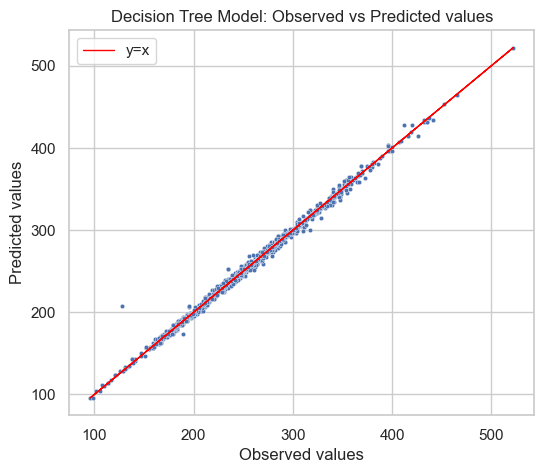

In [ ]:
# Using plot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_pred_true(y_test, dt_test_pred, ax)
plt.title('Decision Tree Model: Observed vs Predicted values')